<a href="https://colab.research.google.com/github/paula-rj/Procesamiento-de-datos-Cloudsat-y-GOES16/blob/main/Abrir_y_graficar_archivos_Cldclass_con_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Abrir archivos CLDCLASS y graficarlos con Python

## Manuales
[Cloudsat](https://ccplot.org/pub/resources/CloudSat/CloudSat%20Data%20Users%20Handbook.pdf)

[Archivos CLDCLASS](http://www.cloudsat.cira.colostate.edu/sites/default/files/products/files/2B-CLDCLASS_PDICD.P1_R05.rev1_.pdf) de Cloudsat, manual más actualizado.


[VS data](http://pysclint.sourceforge.net/pyhdf/pyhdf.VS.html) en pyhdf

[Fuente](https://docserver.gesdisc.eosdis.nasa.gov/public/project/MEaSUREs/Fetzer/README.AIRS_CloudSat.pdf) de la mayor parte del codigo

# Instalar librerías
Primero instalamos todas las librerias que haya que instalar. 

En Colab estas serian:
Geopandas, Basemap, PyHDF, Cartopy, NetCDF4.

En Kaggle: PyHDF, Cartopy.

In [2]:
#Instalar basemap
#No lo estoy usando porque 'is depracated in favor of cortopy' pero bueno lo dejo acá por las dudas
#!apt-get install libgeos-3.5.0
#!apt-get install libgeos-dev
#!pip install https://github.com/matplotlib/basemap/archive/master.zip

In [3]:
#Si estas en kaggle, pasar o comentar esta linea, no hace falta
!pip install geopandas

     |████████████████████████████████| 1.0MB 9.3MB/s 
     |████████████████████████████████| 15.3MB 203kB/s 
     |████████████████████████████████| 6.5MB 28.4MB/s 
     |████████████████████████████████| 92kB 8.6MB/s 
  Found existing installation: click 8.0.0
    Uninstalling click-8.0.0:
      Successfully uninstalled click-8.0.0


In [4]:
%%bash
apt-get install build-essential python3-dev python3-numpy libhdf4-dev -y

Reading package lists...
Building dependency tree...
Reading state information...
build-essential is already the newest version (12.4ubuntu1).
python3-dev is already the newest version (3.6.7-1~18.04).
python3-dev set to manually installed.
The following packages were automatically installed and are no longer required:
  default-libmysqlclient-dev libarmadillo-dev libarpack2-dev libdap-dev
  libdapserver7v5 libepsilon-dev libfreexl-dev libfyba-dev libgeos-dev
  libgeotiff-dev libgif-dev libjson-c-dev libkml-dev libkmlconvenience1
  libkmlregionator1 libkmlxsd1 libminizip-dev libmysqlclient-dev libnetcdf-dev
  libnvidia-common-460 libogdi3.2-dev libopenjp2-7-dev libpoppler-dev
  libpoppler-private-dev libpq-dev libproj-dev libqhull-dev libqhull-r7
  libspatialite-dev libsqlite3-dev libsuperlu-dev liburiparser-dev libwebp-dev
  libxerces-c-dev unixodbc-dev
Use 'apt autoremove' to remove them.
The following additional packages will be installed:
  libhdf4-0
Suggested packages:
  libhdf4-d

In [5]:
#Instalar pyhdf
%%bash
pip install pyhdf #git+https://github.com/hdfeos/pyhdf.git

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for pyhdf: filename=pyhdf-0.10.2-cp37-cp37m-linux_x86_64.whl size=256772 sha256=43e2a78ab6add48ba1bbc6478a14e7c2028ad310f9f994082225f06b8dd6b124
  Stored in directory: /root/.cache/pip/wheels/6c/34/4c/25b83941b312940026288083fbcfba3679d21d0617e83846b5
Successfully built pyhdf


In [6]:
#Si estas en kaggle, pasar o comentar esta linea, no hace falta
#En Colab Cartopy se rompe si no tiene instalados estos paquetes (2021)
!apt-get install -qq libgdal-dev libproj-dev
!pip install --no-binary shapely shapely --force

(Reading database ... 161020 files and directories currently installed.)
Removing libhdf4-dev (4.2.13-2) ...
Selecting previously unselected package libhdf4-alt-dev.
(Reading database ... 160951 files and directories currently installed.)
Preparing to unpack .../libhdf4-alt-dev_4.2.13-2_amd64.deb ...
Unpacking libhdf4-alt-dev (4.2.13-2) ...
Selecting previously unselected package libgdal-dev.
Preparing to unpack .../libgdal-dev_2.2.3+dfsg-2_amd64.deb ...
Unpacking libgdal-dev (2.2.3+dfsg-2) ...
Setting up libhdf4-alt-dev (4.2.13-2) ...
Setting up libgdal-dev (2.2.3+dfsg-2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     |████████████████████████████████| 389kB 9.2MB/s 
Skipping wheel build for shapely, due to binaries being disabled for it.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Shapely 1.7.1
    Uninstalling Shapely-1.7.1:
      Successfully uninstalled Shapely

In [9]:
!pip install cartopy

     |████████████████████████████████| 12.1MB 9.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 225kB 30.8MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516154 sha256=2c550cf8478b5cd29ff51ba3717c50de565308a8b5bf21e4aa051b02e12736c1
  Stored in directory: /root/.cache/pip/wheels/45/7f/3b/37879587817fd1bbbee7b47312e2401b4f542cccf2fbe9b4ee
Successfully built cartopy
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl size=37264 sha256=2cec19becb2db104002f9f50fd5e1c7872c0a451ca7b2a0fd1510a2873d02762
  Stored in directory: /root/.cache/pip/wheels/76/2b/d4/53e6b9a0fb0a9f9f29664cf82605af8bc81d5ab44d987896dd
Successfully built pyshp


In [7]:
#Si estas en kaggle, pasar o comentar esta linea, no hace falta
!pip install netcdf4

Contextily sirve para poner un mapa base estio los del gps abajo de los graficos de Geopandas. Si no interesa esto, no instalarlo

In [8]:
#Si estas en kaggle, pasar o comentar esta linea, no hace falta
!pip install contextily 

     |████████████████████████████████| 19.1MB 76.6MB/s 


In [1]:
#Importamos varias librerías necesarias 
import pyhdf
from pyhdf.HDF import *
from pyhdf.VS import *
import pprint
import numpy as np
import matplotlib.pyplot as plt

import os, sys, matplotlib
import numpy as np
# from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from pylab import linspace
from scipy import interpolate
from matplotlib.colors import LinearSegmentedColormap

import pandas as pd
import geopandas as gpd
import seaborn as sns

from pyhdf.SD import SD, SDC  

import cartopy.crs as ccrs  # Plot maps

In [2]:
def cmap_discretize(cmap, n):
  
    #Return a discrete colormap from the continuous colormap cmap.
    #cmap: colormap instance, eg. cm.jet.
    #n: number of colors.
    #Example
    #x = resize(arange(100), (5,100))
    #djet = cmap_discretize(cm.jet, 5)
    #imshow(x, cmap=djet)
    
  cdict = cmap._segmentdata.copy()
  # n colors
  colors_i = linspace(0,1.,n)
  # n+1 indices
  indices = linspace(0,1.,n+1)
  for key in ('red','green','blue'):
 # Find the n colors
    D = np.array(cdict[key])
    I = interpolate.interp1d(D[:,0], D[:,1])  
    colors = I(colors_i)
 # Place these colors at the correct indices.
    A = np.zeros((n+1,3), float)
    A[:,0] = indices
    A[1:,1] = colors
    A[:-1,2] = colors
 # Create a tuple for the dictionary.
    L = []
    for l in A:
      L.append(tuple(l))
    cdict[key] = tuple(L)
 # Return colormap object.
  return LinearSegmentedColormap('colormap',cdict,1024)

# Importar archivos
Ahora importamos los archivos del dataset desde Kaggle.

Si estas en Kaggle esta seccion es innecesaria y no corre. Simplemente modificar los paths de los archivos.

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [5]:
%pwd 
#Chequeamos que el directorio donde estamos trabajando sea content
#Si tira error en Colab, reiniciar entorno de ejecucion

'/content'

In [6]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
%pwd

/content/gdrive/My Drive/Kaggle


'/content/gdrive/My Drive/Kaggle'

Correr las siguientes dos celdas solo si se actualizo el dataset o se esta ejecutando el codigo por primera vez. No pasa nada, pero es innecesario correrlas si no hay archivos nuevos.

In [14]:
#Copiamos el API command del dataset que queremos bajar, con un ! adelante 
!kaggle datasets download -d polavr/cloudtypes

100% 938M/942M [00:15<00:00, 44.0MB/s]
100% 942M/942M [00:15<00:00, 63.6MB/s]


In [15]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  cloudtypes.zip
replace 2013085084411_36761_CS_2B-GEOPROF_GRANULE_P_R04_E06.h5? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: 2013085084411_36761_CS_2B-GEOPROF_GRANULE_P_R04_E06.h5  
  inflating: 2015001044921_46166_CS_2B-CLDCLASS-LIDAR_GRANULE_P1_R05_E06_F00.hdf  
  inflating: 2018139143122_64218_CS_2B-CLDCLASS_GRANULE_P1_R05_E07_F03.hdf  
  inflating: 2018283005217_66313_CS_2B-GEOPROF-LIDAR_GRANULE_P2_R05_E08_F03.hdf  
  inflating: 2019001041234_67528_CS_2B-CLDCLASS_GRANULE_P1_R05_E08_F03.hdf  
  inflating: 2019001055106_67529_CS_2B-CLDCLASS_GRANULE_P1_R05_E08_F03.hdf  
  inflating: 2019001072938_67530_CS_2B-CLDCLASS_GRANULE_P1_R05_E08_F03.hdf  
  inflating: 2019001154218_67535_CS_2B-CLDCLASS_GRANULE_P1_R05_E08_F03.hdf  
  inflating: 2019001172050_67536_CS_2B-CLDCLASS_GRANULE_P1_R05_E08_F03.hdf  
  inflating: 2019001185922_67537_CS_2B-CLDCLASS_GRANULE_P1_R05_E08_F03.hdf  
  inflating: 2019002045035_67543_CS_2B-CLDCLASS_GRANULE_P1_R05_E08_F03.hdf  
  inflating: 2019002

# Abrir archivos CLDCLASS con PyHDF
Algunos tutoriales:

Ver las [variables](https://stackoverflow.com/questions/31003968/fields-not-found-when-using-pyhdf) con pyhdf

Documentacion sobre los módulos VS y SD de [pyhdf](http://pysclint.sourceforge.net/pyhdf/documentation.html)

Abrir [hdf's](https://hdfeos.org/zoo/LaRC/CER_ES4_Aqua-FM3_Edition1-CV_024032.200908.hdf.py) con pyhdf versus con netcdf4

**Leer y explorar archivos .hdf con pyhdf: **
Fuente: esta [pagina](http://fhs.github.io/pyhdf/modules/SD.html). Tambien explican algunas funciones incuilas en la libreria pyhdf.

Ahora leemos las variables directamente desde los archivos hdf.
Esta parte la saque de [aqui](https://moonbooks.org/Codes/Plot-cldclass-lidar-granule-vertical-profile-using-python-3/)

Returns:
  List of vdata descriptions. Each vdata is described as
  a 9-element tuple, composed of the following:

    - vdata name
    - vdata class
    - vdata reference number
    - vdata number of records
    - vdata number of fields
    - vdata number of attributes
    - vdata record size in bytes
    - vdata tag number
    - vdata interlace mode

In [142]:
#Path del archivo CLDCLASS
path = '/content/gdrive/MyDrive/Kaggle/2019003183652_67566_CS_2B-CLDCLASS_GRANULE_P1_R05_E08_F03.hdf'

Abrimos la sección del archivo tipo HDF donde estan las variables en formato VS (Vdata table, tablas de datos estructuradas dentro del archivo HDF; mas info [acá](http://pysclint.sourceforge.net/pyhdf/pyhdf.VS.html)). Acá estan todas las variables que tienen que ver con ubicación en tiempo y espacio del satélite, en particular latitud, longitud, y tiempo utc.

In [143]:
hdf_file = HDF(path, HC.READ)
vs = hdf_file.vstart()
vdata = vs.vdatainfo() #es una lista de tuplas. acá estan lat y long y cloud layers
vdata

[('Profile_time', '', 7, 36951, 1, 0, 4, 1962, 0),
 ('UTC_start', '', 8, 1, 1, 0, 4, 1962, 0),
 ('TAI_start', '', 9, 1, 1, 0, 8, 1962, 0),
 ('Latitude', '', 10, 36951, 1, 0, 4, 1962, 0),
 ('Longitude', '', 11, 36951, 1, 0, 4, 1962, 0),
 ('Range_to_intercept', '', 13, 36951, 1, 0, 4, 1962, 0),
 ('DEM_elevation', '', 14, 36951, 1, 0, 2, 1962, 0),
 ('Vertical_binsize', '', 15, 1, 1, 0, 4, 1962, 0),
 ('Pitch_offset', '', 16, 1, 1, 0, 4, 1962, 0),
 ('Roll_offset', '', 17, 1, 1, 0, 4, 1962, 0),
 ('Data_quality', '', 18, 36951, 1, 0, 1, 1962, 0),
 ('Data_status', '', 19, 36951, 1, 0, 2, 1962, 0),
 ('Data_targetID', '', 20, 36951, 1, 0, 1, 1962, 0),
 ('RayStatus_validity', '', 21, 36951, 1, 0, 1, 1962, 0),
 ('Navigation_land_sea_flag', '', 22, 36951, 1, 0, 1, 1962, 0),
 ('Precip_flag', '', 23, 36951, 1, 0, 1, 1962, 0),
 ('SST', '', 24, 36951, 1, 0, 4, 1962, 0),
 ('Surface_wind', '', 25, 36951, 1, 0, 4, 1962, 0),
 ('CloudLayer', '', 28, 36951, 1, 0, 2, 1962, 0),
 ('nray:2B-CLDCLASS', 'DimVal0.1

In [144]:
vd = vs.attach('Latitude', write=0)
#veamos algunos atributos
print("vdata: ", vd._name)      # predefined attribute: vdata name
print("nrecs: ", vd._nrecs)      # predefined attribute:  num records

vdata:  Latitude
nrecs:  36951


In [145]:
# Read all records at once, and loop over the sequence.
lat = vd[:]
vd.detach

<bound method VD.detach of <pyhdf.VS.VD object at 0x7f58404d8a50>>

In [146]:
vd = vs.attach('Longitude', write=0)
#veamos algunos atributos
print("vdata: ", vd._name)      # predefined attribute: vdata name
print("nrecs: ", vd._nrecs)      # predefined attribute:  num records

# Read all records at once, and loop over the sequence.
lon = vd[:]
vd.detach
vs.end()                  # terminate the vdata interface

vdata:  Longitude
nrecs:  36951


Comprobamos los primeros elementos de los vectores lat y lon, que serian la latitud y longitud donde empiezan esta orbita en particular.

In [147]:
lat[0], lon[0]

([-0.004875324200838804], [107.62960052490234])

Convertimos lat y lon en un vector como objeto de numpy, simplemente le damos nueva forma

In [148]:
latitud = np.array(lat).flatten()
print(latitud.shape)

longitud = np.array(lon).flatten()
print(longitud.shape, type(longitud))

(36951,)
(36951,) <class 'numpy.ndarray'>


In [149]:
hdf_file.close()  # Cerramos el archivo HDF file. A veces anda y a veces no, 
#si tira error no importa, seguir con el resto del codigo

HDF4Error: ignored

Ahora leemos las variables que estan en formato SD (scientific
dataset, similar al netCDF; más info [acá](http://pysclint.sourceforge.net/pyhdf/pyhdf.SD.html)) dentro del mismo HDF. 

En este formato se encuetran la altura 'Height' y las clasificaciones de nubes segun altura o capa.

In [150]:
from pyhdf.SD import SD, SDC    
file = SD(path, SDC.READ)  
file.datasets()

{'CloudLayerBase': (('nray:2B-CLDCLASS', 'Ncloud:2B-CLDCLASS'),
  (36951, 10),
  5,
  2),
 'CloudLayerTop': (('nray:2B-CLDCLASS', 'Ncloud:2B-CLDCLASS'),
  (36951, 10),
  5,
  3),
 'CloudLayerType': (('nray:2B-CLDCLASS', 'Ncloud:2B-CLDCLASS'),
  (36951, 10),
  22,
  4),
 'Height': (('nray:2B-CLDCLASS', 'nbin:2B-CLDCLASS'), (36951, 125), 22, 0),
 'cloud_scenario': (('nray:2B-CLDCLASS', 'nbin:2B-CLDCLASS'),
  (36951, 125),
  22,
  1)}

Exploramos algunas variables

In [151]:
print('---------- CloudScenario ----------')

sds_obj = file.select('cloud_scenario') # select sds
cloud_scenario = sds_obj.get()
sds_info = sds_obj.info()

print(cloud_scenario.shape)
print( sds_info )
print( sds_info[0], sds_info[1] )
print( 'sds attributes' )
pprint.pprint( sds_obj.attributes() )

for i in range(10):
	print([cloud_scenario[i,j] for j in range(10)])

---------- CloudScenario ----------
(36951, 125)
('cloud_scenario', 2, [36951, 125], 22, 0)
cloud_scenario 2
sds attributes
{}
[2113, 2113, 2113, 2113, 2113, 2113, 2113, 2113, 2113, 2113]
[2113, 2113, 2113, 2113, 2113, 2113, 2113, 2113, 2113, 2113]
[2113, 2113, 2113, 2113, 2113, 2113, 2113, 2113, 2113, 2113]
[2113, 2113, 2113, 2113, 2113, 2113, 2113, 2113, 2113, 2113]
[2113, 2113, 2113, 2113, 2113, 2113, 2113, 2113, 2113, 2113]
[2113, 2113, 2113, 2113, 2113, 2113, 2113, 2113, 2113, 2113]
[2113, 2113, 2113, 2113, 2113, 2113, 2113, 2113, 2113, 2113]
[2113, 2113, 2113, 2113, 2113, 2113, 2113, 2113, 2113, 2113]
[2113, 2113, 2113, 2113, 2113, 2113, 2113, 2113, 2113, 2113]
[2113, 2113, 2113, 2113, 2113, 2113, 2113, 2113, 2113, 2113]


In [152]:
#cloud_scenario[12580:13580,-1]

In [153]:
print('---------- CloudLayerType ----------')

sds_obj = file.select('CloudLayerType') # select sds

CloudLayerType = sds_obj.get() 

sds_info = sds_obj.info()

print(CloudLayerType.shape)
print( sds_info )
print( sds_info[0], sds_info[1] )
print( 'sds attributes' )
pprint.pprint( sds_obj.attributes() )

for i in range(10):
	print([CloudLayerType[i,j] for j in range(10)])


---------- CloudLayerType ----------
(36951, 10)
('CloudLayerType', 2, [36951, 10], 22, 0)
CloudLayerType 2
sds attributes
{}
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Extraemos las variables que nos interesan y las guardamos en arrays. En este caso solo quiero hacer los graficos de una capa en coordenadas lat, lon y el de las nubes segun cada capa vs altura, por lo que voy a extraer las variables para hacer esos gráficos:

In [154]:
cld_layertype= file.select('CloudLayerType')[:]
layer_base = file.select('CloudLayerBase')[:]
layer_top = file.select('CloudLayerTop')[:]
height = file.select('Height')[:]

Cloud types es una matriz de 36mil y pico x 125, que da el tipo de nube segun la altura. Observar que la forma coincide con la de height por lo que se puede plottear altura vs latitud o longitud con tipos de nubes.

Cloud layer type da el tipo de nube segun la capa, dividiendo toda la altura en 10 capas. Tambien se podria graficar tipo de nube vs capa por latura usando las variables cloud layer base y cloud layer top.

Exploremos un poco la matriz height.

In [155]:
matrix = np.argwhere(height[:,:] != -99)

In [156]:
matrix.shape

(4618794, 2)

In [157]:
height[matrix[0]]

array([[-9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999,
        -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999,
        -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999,
        -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999,
        -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999,
        -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999,
        -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999,
        -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999,
        -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999,
        -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999,
        -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999,
        -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999,
        -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999,
        -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999],
       [-999

In [158]:
#arr = np.array([height[matrix[0]], cloud_scenario[matrix[0]]])
#arr[0:5,:].T

Exploramos un poco las variables layer base y layer top

In [159]:
print(layer_base[3876,:])
print(layer_top[3876,:])
print(cld_layertype[3876,:])
print('lat', latitud[3876])
print('lon', longitud[3876])

[-99. -99. -99. -99. -99. -99. -99. -99. -99. -99.]
[-99. -99. -99. -99. -99. -99. -99. -99. -99. -99.]
[0 0 0 0 0 0 0 0 0 0]
lat -37.472877502441406
lon 98.76490783691406


In [160]:
'''Shape layer type={}, shape height= {}, shape layer base={}, shape layer top={}, shape lat ={}, 
shape lon={}'''.format(cld_layertype.shape,
                       height.shape, layer_base.shape, layer_top.shape, np.shape(latitud), np.shape(longitud))
#Con esto ya tenemos todo para plotear, por ahora

'Shape layer type=(36951, 10), shape height= (36951, 125), shape layer base=(36951, 10), shape layer top=(36951, 10), shape lat =(36951,), \nshape lon=(36951,)'

Elaboramos un diccionario con los códigos del archivo, segun cada numero se asigna un tipo de nube (ver manual cldclass, ahi está descripto)

In [161]:
dic_LayerType = {0:'no',
                 1:'Ci',
                 2:'As',
                 3:'Ac',
                 4:'St',
                 5:'Sc',
                 6:'Cu',
                 7:'Ns',
                 8:'DC'} 
type(dic_LayerType)

dict

# Ploteos

In [27]:
import matplotlib as mpl
fig, ax = plt.figure()
plt.imshow(cld_layertype[12346:12446, :].T, vmin=0, vmax=10, origin='lower', cmap='rainbow')
norm = mpl.colors.Normalize(vmin=0, vmax=10)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap='rainbow'),
             cax=ax, orientation='horizontal', )

TypeError: ignored

<Figure size 432x288 with 0 Axes>

## Una capa proyectada segun GOES
Vamos a utilizar Geopandas para proyectar una capa de las de cloudsat según la proyección del satelite GOES16 y dibujarla sobre ese mapa.

Creamos un dataframe de pandas conteniendo la latitud, longitud y valores del tipo de nube en cada una de las 10 capas.

In [162]:
tipo_capa = pd.DataFrame({'Longitude': longitud, 'Latitude': latitud, 
                          'capa0':cld_layertype[:,0], 'capa1':cld_layertype[:,1],
                          'capa2':cld_layertype[:,2], 'capa3':cld_layertype[:,3],
                          'capa4':cld_layertype[:,4], 'capa5':cld_layertype[:,5],
                          'capa6':cld_layertype[:,6], 'capa7':cld_layertype[:,7],
                          'capa8':cld_layertype[:,8], 'capa9':cld_layertype[:,9]})

Exploremos los elementos del dataframe

In [163]:
tipo_capa.head() #muestra los primeros valores de la tabla para lat, log y cada una de las capas

,Longitude,Latitude,capa0,capa1,capa2,capa3,capa4,capa5,capa6,capa7,capa8,capa9
0,107.629601,-0.004875,0,0,0,0,0,0,0,0,0,0
1,107.627548,-0.014581,0,0,0,0,0,0,0,0,0,0
2,107.625504,-0.024287,0,0,0,0,0,0,0,0,0,0
3,107.623451,-0.033994,0,0,0,0,0,0,0,0,0,0
4,107.621399,-0.043700,0,0,0,0,0,0,0,0,0,0


In [164]:
tipo_capa.iloc[12876,:]

Longitude   -69.587791
Latitude    -54.083961
capa0         2.000000
capa1         0.000000
capa2         0.000000
capa3         0.000000
capa4         0.000000
capa5         0.000000
capa6         0.000000
capa7         0.000000
capa8         0.000000
capa9         0.000000
Name: 12876, dtype: float64

Comprobamos que exista algun valor distinto de 0 para los tipos de nubes de la capa 0 por ejemplo.

In [165]:
tipo_capa.loc[tipo_capa.capa0.isin([5])]

,Longitude,Latitude,capa0,capa1,capa2,capa3,capa4,capa5,capa6,capa7,capa8,capa9
7387,79.196373,-70.312141,5,0,0,0,0,0,0,0,0,0
7388,79.183662,-70.320923,5,0,0,0,0,0,0,0,0,0
7389,79.170944,-70.329712,5,0,0,0,0,0,0,0,0,0
7390,79.158234,-70.338493,5,0,0,0,0,0,0,0,0,0
7391,79.145477,-70.347275,5,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
27917,166.079544,81.668587,5,3,0,0,0,0,0,0,0,0
27918,166.013626,81.666420,5,5,0,0,0,0,0,0,0,0
28239,147.121567,80.478836,5,0,0,0,0,0,0,0,0,0
28240,147.070679,80.473801,5,0,0,0,0,0,0,0,0,0


In [166]:
base = pd.DataFrame({'Longitude': longitud, 
                          'capa0':layer_base[:,0], 'capa1':layer_base[:,1],
                          'capa2':layer_base[:,2], 'capa3':layer_base[:,3],
                          'capa4':layer_base[:,4], 'capa5':layer_base[:,5],
                          'capa6':layer_base[:,6], 'capa7':layer_base[:,7],
                          'capa8':layer_base[:,8], 'capa9':layer_base[:,9]})

In [167]:
top = pd.DataFrame({'Longitude': longitud, 'Latitude': latitud, 
                          'capa0':layer_top[:,0], 'capa1':layer_top[:,1],
                          'capa2':layer_top[:,2], 'capa3':layer_top[:,3],
                          'capa4':layer_top[:,4], 'capa5':layer_top[:,5],
                          'capa6':layer_top[:,6], 'capa7':layer_top[:,7],
                          'capa8':layer_top[:,8], 'capa9':layer_top[:,9]})

## Ploteo de altura vs longitud para cada capa

In [168]:
#Comprobamos que haya algun valor distinto de -99 que es missing value en Layer Base
for i in range(layer_base.shape[0]):
	nb_cloud_layer = np.where(layer_base[i,:] < 0 )

nb_cloud_layer

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),)

In [169]:
f = plt.figure()
ax = f.add_subplot(111)

#for i in range(CloudLayerBase.shape[0]):
for i in range(layer_base.shape[0]):
	nb_cloud_layer = np.where(layer_base[i,:] < 0 )[0][0]
	for j in range(10):
		if layer_base[i,j] > 0 and layer_top[i,j] > 0.0:
			bar_xi = i
			bar_width = 1.0
			bar_base = layer_base[i,j] 
			bar_height = layer_top[i,j] - bar_base
      layer_phase = cld_layertype[i,j]
			bar_color = '1.0'
      if layer_phase == 0:
                      bar_color = 'white'
                    if layer_phase == 1:
                        bar_color = 'royalblue'
                    if layer_phase == 2:
                        bar_color = 'firebrick'
			bar_edgecolor = '1.0'
			plt.bar(left=bar_xi, height=bar_height, width=bar_width, bottom=bar_base, color=bar_color, edgecolor=bar_edgecolor)
                    
                        

#plt.bar(bar_xi, bar_height, width=bar_width, bottom=bar_base, color=bar_color, edgecolor=bar_edgecolor)
ax.set_facecolor('xkcd:lightblue')

plt.legend()

plt.ylim(0,20)

#xticks_idx = [int(i) for i in np.linspace(cldclass_lidar_start_idx,cldclass_lidar_end_idx,10)]
#xticks_latitude = [ "{0:.2f}".format(latitude_table[i][0]) for i in xticks_idx]
#plt.xticks(xticks_idx, xticks_latitude,rotation=45)

plt.xlabel('Latitude')
plt.ylabel('Altitude (in km)')

plt.title('Cloud Mask')

plt.show()

IndentationError: ignored

KeyboardInterrupt: ignored

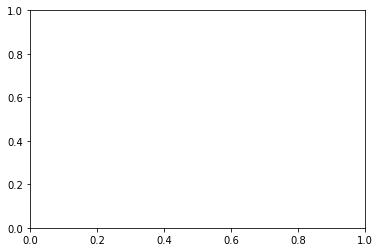

In [170]:
ax = base.plot.bar(x='Longitude', stacked=True)

## Latitud vs longitud, scatterplot de la capa
Primero voy a dibujar sin mapa, solo latitud, longitud y los tipos de nubes para cada coordenada.

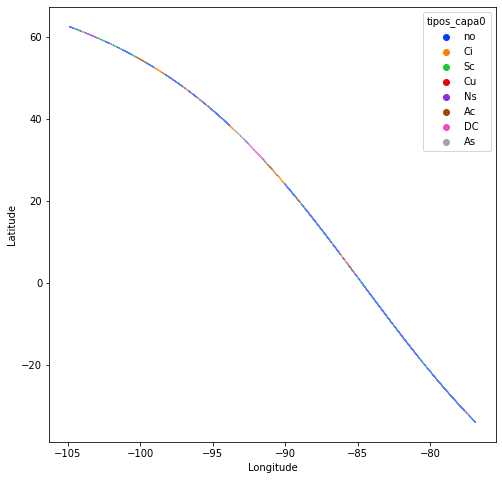

In [171]:
#Ploteo de capa 0 en lat,lon sin proyeccion
def latlonplot(tipo_capa):
  fig_dims = (8, 8)
  fig, ax = plt.subplots(figsize=fig_dims)
  sns.scatterplot(x='Longitude', y='Latitude', data= tipo_capa.assign(tipos_capa0 =tipo_capa.capa0.map(dic_LayerType)), 
                  hue='tipos_capa0',palette='bright',marker='o', s=1)
  ax.set_xlabel('Longitude')
  ax.set_ylabel('Latitude')
  plt.show()

latlonplot(tipo_capa.iloc[15000:25000,:])

## Con proyeccion geoestacionaria de GOES16

Voy a graficar la capa 0 y la reproyecto a latitud, longitud.

In [172]:
geo_df = gpd.GeoDataFrame(tipo_capa.loc[:,['Longitude','Latitude','capa0']], 
                          geometry=gpd.points_from_xy(tipo_capa.Longitude, tipo_capa.Latitude))
geo_df.crs = {'init': 'epsg:4326'} # EPSG 4326 corresponds to coordinates in latitude and longitude

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [173]:
geo_df.loc[geo_df.capa0.isin([1])] 
#vemos que se agrega esa tabla geometry que es lo que usa geopandas para proyectar despues

,Longitude,Latitude,capa0,geometry
10109,-35.081402,-78.394424,1,POINT (-35.08140 -78.39442)
10110,-35.115707,-78.387535,1,POINT (-35.11571 -78.38754)
12823,-69.338676,-54.582970,1,POINT (-69.33868 -54.58297)
12824,-69.343422,-54.573559,1,POINT (-69.34342 -54.57356)
12837,-69.404984,-54.451199,1,POINT (-69.40498 -54.45120)
...,...,...,...,...
25748,-111.624046,69.217392,1,POINT (-111.62405 69.21739)
25749,-111.635628,69.226303,1,POINT (-111.63563 69.22630)
25750,-111.647209,69.235214,1,POINT (-111.64721 69.23521)
25751,-111.658798,69.244125,1,POINT (-111.65880 69.24413)


In [174]:
  #dibujo con proyección mercator epsg=32630, con mapa estilo gps de fondo
#import contextily as cx
#ax = geo_df.to_crs(epsg=32630).plot(figsize=(8,10), cmap= cmap_discretize(cm.gist_ncar_r, 9)) 
#cx.add_basemap(ax)

In [175]:
  #Reproyectar al sistema de GOES cada uno de los puntos
geodf_toGOES = geo_df.to_crs("+proj=geos +h=35786023.0 +lon_0=-75.0")
geodf_toGOES.head()

,Longitude,Latitude,capa0,geometry
0,107.629601,-0.004875,0,POINT (inf inf)
1,107.627548,-0.014581,0,POINT (inf inf)
2,107.625504,-0.024287,0,POINT (inf inf)
3,107.623451,-0.033994,0,POINT (inf inf)
4,107.621399,-0.043700,0,POINT (inf inf)


In [176]:
crs=ccrs.Geostationary(central_longitude=-75.0, satellite_height=35786023.0) #proyeccion geoestacionaria para Goes16

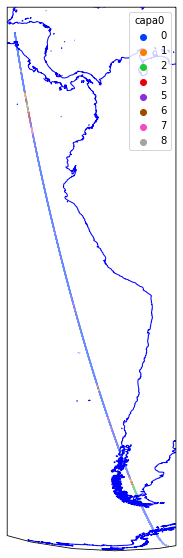

In [186]:
fig_dims = (10, 10)
fig, axis = plt.subplots(figsize=fig_dims)

axis = plt.axes(projection=crs)
axis.gridlines 
axis.coastlines(resolution='10m',color='blue') 
sns.scatterplot(x='Longitude', y='Latitude', data=geodf_toGOES.iloc[10000:20000,:], hue='capa0',palette='bright',s=2, transform=ccrs.PlateCarree())
#el transform es lo que hace que el sns se dibuje sobre el mapa
#geo_df.to_crs("+proj=geos +h=35786023.0 +lon_0=-75.0").plot(figsize=(10,10), ax=axis) esto funcionaria pero hay que agregarle un cmap

# Clases finales

Finalmente definimos clases y funciones que realizan el procedimiento explicado anteriormente para que sea mas facil realizarlo para muchos archivos y el codigo sea mas reproducible. 

In [225]:
class CldClass:
  def __init__(self,path_total):
    self.path_total = path_total
    self.file_name = os.path.split(self.path_total)[-1]
    date = self.file_name.split('_')[0]
    self.year = date[:4]
    self.julian_day = date[4:7]
    self.hour_utc = date[7:9]
    self.light=''
    if int(self.hour_utc)>10:
      self.light='day'
    else:
      self.light='night'
  
  def open_cldclass(self, sur=True):
    """
      Función que toma un path donde debe estar el archivo CLDCLASS de Cloudsat y devuelve un dataframe de Pandas 
    con los datos del archivo cldclass guardados en columnas del dataframe: latitud, longitud, capa0, capa1,..., capa9;
    con cada tipo de nube segun cada capa.
    Parameters:
    -----------
    sur : Bool. Si se quiere abrir solo la parte de sudamerica. Default=True.

    Returns:
    -----------
    layers_df: Pandas Dataframe lat, lon, tipo de nube en cada una de las capas (son 10)
    """
  #Read v data
    hdf_file = HDF(self.path_total, HC.READ)
    vs = hdf_file.vstart()
    vdata = vs.vdatainfo() #es una lista de tuplas. acá estan lat y long y cloud layers

    vd_lat = vs.attach('Latitude', write=0)
    lat = vd_lat[:]
    vd_lat.detach

    vd_lon = vs.attach('Longitude', write=0)
    lon = vd_lon[:]
    vd_lon.detach
    vs.end() 
    #hdf_file.close()

    latitud = np.array(lat).flatten()
    longitud = np.array(lon).flatten()

    #Read sd data
    file = SD(self.path_total, SDC.READ)  
    start_point=0
    end_point=36951
    if sur==True:
      if self.light=='night':
        end_point = 6000 
      else:
        end_point=20000
        if self.hour_utc==(15):
          start_point=6000
        else: #16,17,18 utc
          start_point=10000
      latitud = latitud[start_point:end_point]
      longitud = longitud[start_point:end_point]
      cld_layertype= file.select('CloudLayerType')[start_point:end_point] 
    else: #grafica toda la orbita
      cld_layertype= file.select('CloudLayerType')[:]

    layers_df = pd.DataFrame({'Longitude': longitud, 'Latitude': latitud, 
                            'capa0':cld_layertype[:,0], 'capa1':cld_layertype[:,1],
                            'capa2':cld_layertype[:,2], 'capa3':cld_layertype[:,3],
                            'capa4':cld_layertype[:,4], 'capa5':cld_layertype[:,5],
                            'capa6':cld_layertype[:,6], 'capa7':cld_layertype[:,7],
                            'capa8':cld_layertype[:,8], 'capa9':cld_layertype[:,9]})
    
    return layers_df

  def plot_cldclass_geos(self,layers_data, capa_n):
    """
      Función que grafica los tipos de nubes en la capa asignada en la pasada del Cloudsat.
    Parameters:
    -----------
    layers_data : Pandas Dataframe. 
      Dataframe de Pandas que contiene Latitud,Longitud,y la capa que se quiere graficar.
    capa_n : int
      Numero de capaque se quiere graficar. Van de 0 a 9.

    Returns:
    -----------
    Plot. Tipo de nube en la capa 9 con órbita proyectada en proyeccion geoestacionaria de GOES16, 
    con mapa de costas de fondo.
    """
    capa_str = 'capa' + str(capa_n)

    #Generamos geodataframe a partir del pd dataframe de entrada
    geo_df = gpd.GeoDataFrame(layers_data.loc[:,['Longitude','Latitude',capa_str]], 
                            geometry=gpd.points_from_xy(layers_data.Longitude, layers_data.Latitude))
    geo_df.crs = {'init': 'epsg:4326'} # EPSG 4326 corresponds to coordinates in latitude and longitude
    #Reprojecting into GOES16 geostationary projection 
    geodf_GOESproj = geo_df.to_crs("+proj=geos +h=35786023.0 +lon_0=-75.0")
    crs=ccrs.Geostationary(central_longitude=-75.0, satellite_height=35786023.0) #proyeccion geoestacionaria para Goes16
    fig_dims = (10, 10)
    fig, axis = plt.subplots(figsize=fig_dims)
    axis = plt.axes(projection=crs)
    axis.gridlines 
    axis.coastlines(resolution='10m',color='blue') 
    sns.scatterplot(x='Longitude', y='Latitude', data=geodf_GOESproj, hue=capa_str,
                    palette='bright',s=2, transform=ccrs.PlateCarree())
    axis.set_title("""year {}; day {}; hour {}; {}""".format(self.year, self.julian_day, self.hour_utc,self.light))
    plt.show()

  def plotlatlon_cld(self, capa_n, layers_data_df):
    """
       Grafica la capa capa_n con latitud en el eje y y longitud en el eje x, sin ninguna proyeccion
        Parameters
        ----------
        capa_n : int
            El numero de capa que quiero dibujar. Entre 0 y 9.
        layers_data_df : pandas DataFrame
            DataFrame de Pandas o Geopandas que incluya latitud, longitud y la capa que vamos a dibujar.
        Returns
        ----------
        Plot."""

    capa_str = 'capa' + str(capa_n)
    fig_dims = (6, 6)
    fig, ax = plt.subplots(figsize=fig_dims)
    sns.scatterplot(x='Longitude', y='Latitude', data=layers_data_df, hue='capa2',palette='bright',marker='o', s=1)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    plt.show()


Probemos graficar algunas de interes. 

Vamos a abrir una imagen nocturna del 3 de enero de 2019. (Editar el path si es necesario)

In [217]:
#Generamos objeto CldClass
night_5= CldClass('/content/gdrive/MyDrive/Kaggle/2019003052836_67558_CS_2B-CLDCLASS_GRANULE_P1_R05_E08_F03.hdf')

In [218]:
#Pedimos que nos de la fecha del archivo, hay dos formas de hacerlo:
night_5.year, night_5.julian_day, night_5.hour_utc, night_5.light

('2019', '003', '05', 'night')

In [219]:
#Abrimos el archivo sólo en la parte de sudamérica
sud_df = night_5.open_cldclass()

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


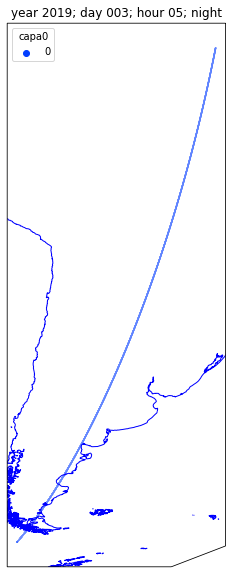

In [220]:
#Pedimos que lo grafique con proyeccion de GOES16
night_5.plot_cldclass_geos(sud_df,0)

Probemos con una imagen diurna

In [226]:
#Generamos objeto tipo CldClass
day15 = CldClass('/content/gdrive/MyDrive/Kaggle/2019003151948_67564_CS_2B-CLDCLASS_GRANULE_P1_R05_E08_F03.hdf')

In [227]:
day15.light

'day'

In [228]:
day15df = day.open_cldclass()

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


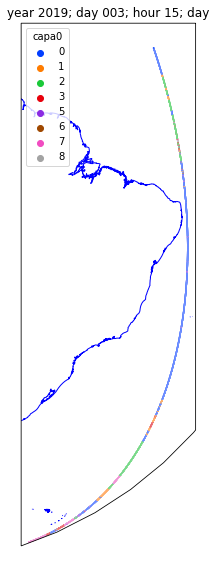

In [229]:
day15.plot_cldclass_geos(day15df,0)

In [230]:
day16 = CldClass('/content/gdrive/MyDrive/Kaggle/2019003165820_67565_CS_2B-CLDCLASS_GRANULE_P1_R05_E08_F03.hdf')

In [231]:
day16df = day16.open_cldclass()

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


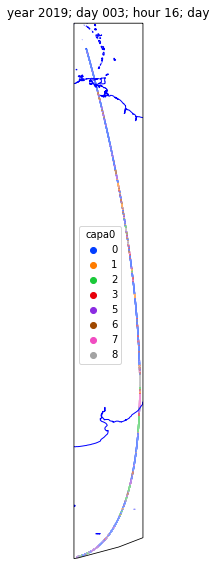

In [232]:
day16.plot_cldclass_geos(day16df,0)

In [233]:
day18 = CldClass('/content/gdrive/MyDrive/Kaggle/2019003183652_67566_CS_2B-CLDCLASS_GRANULE_P1_R05_E08_F03.hdf')


In [234]:
day18df = day18.open_cldclass()

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


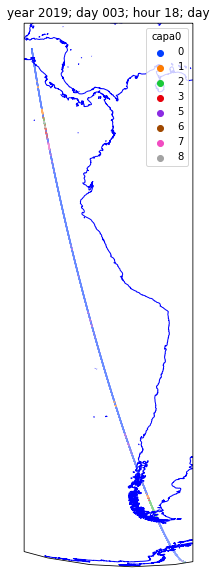

In [235]:
day18.plot_cldclass_geos(day18df,0)

# Transformar hdf a netcdf

[Documentacion](https://www.ncl.ucar.edu/Document/Tools/ncl_convert2nc.shtml) del comando que usamos para convertir 

1º importamos conda

In [ ]:
%%bash
wget -c https://repo.continuum.io/archive/Anaconda3-5.1.0-Linux-x86_64.sh
chmod +x Anaconda3-5.1.0-Linux-x86_64.sh
bash ./Anaconda3-5.1.0-Linux-x86_64.sh -b -f -p /usr/local

In [ ]:
import sys 
sys.path.append('/usr/local/lib/python3.6/site-packages')

In [ ]:
!conda create -n ncl_stable -c conda-forge ncl --yes

In [ ]:
!conda update conda -y -q
!source /usr/local/etc/profile.d/conda.sh
!conda init 
!conda install -n root _license -y -q

In [ ]:
%%bash
source activate ncl_stable

python
import sys
# some simple python commands
sys.path.append('/usr/local/lib/python3.6/site-packages')
print(sys.path)

print("Python version")
print(sys.version)

2º importar los archivos que estan guardados en drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
#Probamos un comando a ver si anda bien. Deberia dar algo como 6.6.2
!source activate ncl_stable && ncl -V

In [ ]:
#Instalamos esto porque si no no anda
%%bash
apt-get install csh

3º convertir a .nc

In [ ]:
!source activate ncl_stable && ncl_convert2nc /content/2010017014344_19801_CS_2B-CLDCLASS_GRANULE_P1_R05_E03_F00.hdf -nc4c

Nota: instalar netcdf antes de hacer todo lo de ncl o abrir una nueva notebook y ahi correr las otras cosas porque sino es un lio, tarda mucho y no se instala porque se hace lio con los environments de conda